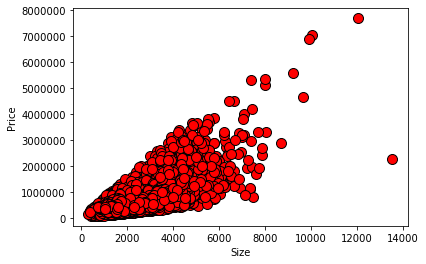

In [4]:
# used for manipulating directory paths
import os

# Scientific and vector computation for python
import numpy as np

# Plotting library
from matplotlib import pyplot

import pandas as pd

data = pd.read_csv("house_data_complete.csv")
#remove NA fields
data.dropna()

#Visualizing data
y = data["price"]
x = data["sqft_living"]
lam = 1
PriceList = []
SizeList = []
PriceList = list(y)
SizeList = list(x)

fig = pyplot.figure()
pyplot.plot(SizeList, PriceList, 'ro', ms=10, mec='k')
pyplot.ylabel('Price')
pyplot.xlabel('Size')

#Normalize the data
#Starting from the price column
cols = data.columns[3:]
normalized_data = (data[cols] - (data[cols]).mean())/(data[cols]).std()
#print(normalized_data)
#update the columns with the normalized values
data[cols] = normalized_data

#3 cateogories of data to train,validate, and test
train, validate, test = np.split(data.sample(frac=1),[int(.6*len(data)), int(.8*len(data))])
#?
train = train.to_numpy()
validate = validate.to_numpy()
test = test.to_numpy()

trainX  = train[:, [3, 4, 5]]
trainY = train[:, 2]

testX = test[:, [3, 4, 5]]
testY = test[:, 2]

#Sizes of the trainings
trainM = trainY.size
trainX = np.concatenate([np.ones((trainM,1)), trainX], axis=1) #?

testM = testY.size
testX = np.concatenate([np.ones((testM,1)), testX], axis=1) #?

def computeCostMulti(trainX, trainY, theta, lam):
    # Initialize some useful values
    trainM = trainY.shape[0] # number of training examples
    J = np.dot((np.dot(trainX, theta) - trainY), (np.dot(trainX, theta) - trainY)) / (2 * trainM) + ((lam/(2*trainM))* np.sum(np.dot(theta, theta)))
    return J

def computeCostMulti2(trainX, trainY, theta, lam):
    # Initialize some useful values
    trainM = trainY.shape[0] # number of training examples
    J=0
    J = np.dot((np.dot(np.square(trainX), theta) - trainY), (np.dot(np.square(trainX), theta) - trainY)) / (2 * trainM) + ((lam/(2*trainM))* np.sum(np.dot(theta, theta)))
    return J

def computeCostMulti3(trainX, trainY, theta, lam):
    # Initialize some useful values
    trainM = trainY.shape[0] # number of training example
    J=0
    J = np.dot((np.dot(np.power(trainX, 3), theta) - trainY), (np.dot(np.power(trainX, 3), theta) - trainY)) / (2 * trainM) + ((lam/(2*trainM))* np.sum(np.dot(theta, theta)))
    return J

def gradientDescentMulti1(trainX, trainY, theta, alpha, num_iters):
    # Initialize some useful values
    trainM = trainY.shape[0] # number of training examples
    theta = theta.copy()
    J_history = []
  
    for i in range(num_iters):
        sumofh0x=np.dot(trainX, theta)
        theta=theta*(1-(alpha*lam)/trainM)-((alpha/trainM)*(np.dot(trainX.T, sumofh0x-trainY)))
        # save the cost J in every iteration
        J_history.append(computeCostMulti(trainX, trainY, theta, lam))
    return theta, J_history

def gradientDescentMulti2(trainX, trainY, theta, alpha, num_iters):

    # Initialize some useful values
    trainM = trainY.shape[0] # number of training examples
    theta = theta.copy()  
    J_history = []
    
    for i in range(num_iters):
        sumofh0x=np.dot(np.square(trainX), theta)
        theta=theta*(1-(alpha*lam)/trainM)-((alpha/trainM)*(np.dot(trainX.T, sumofh0x-trainY))) 
        # save the cost J in every iteration
        J_history.append(computeCostMulti2(trainX, trainY, theta, lam))
    return theta, J_history

def gradientDescentMulti3(trainX, trainY, theta, alpha, num_iters):
    # Initialize some useful values
    trainM = trainY.shape[0] # number of training examples
    theta = theta.copy() 
    J_history = []
    
    for i in range(num_iters):
        sumofh0x=np.dot(np.power(trainX, 3), theta) 
        theta=theta*(1-(alpha*lam)/trainM)-((alpha/trainM)*(np.dot(trainX.T, sumofh0x-trainY)))
        # save the cost J in every iteration
        J_history.append(computeCostMulti3(trainX, trainY, theta, lam)) 
    return theta, J_history



Text(0, 0.5, 'Cost J')

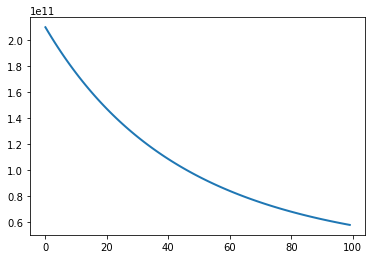

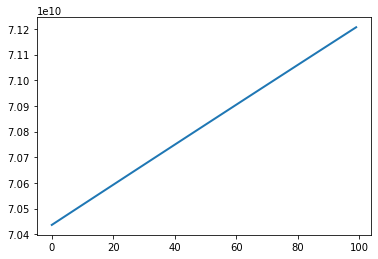

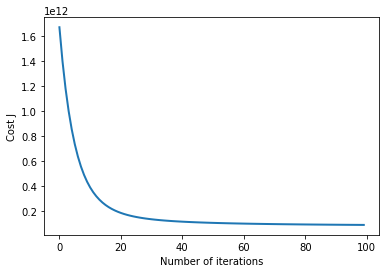

In [6]:
alpha = 0.01
alpha2= 0.0002
num_iters = 100

# init theta and run gradient descent
theta = np.zeros(4)
theta, J_history = gradientDescentMulti1(trainX, trainY, theta, alpha, num_iters)
theta2, J_history2 = gradientDescentMulti2(trainX, trainY, theta, alpha2, num_iters)
theta3, J_history3 = gradientDescentMulti3(trainX, trainY, theta, alpha, num_iters)


# Plot the convergence graph
pyplot.figure()
pyplot.plot(np.arange(len(J_history)), J_history, lw=2, label= 'h1')
pyplot.figure()
pyplot.plot(np.arange(len(J_history2)), J_history2, lw=2, label= 'h2')
pyplot.figure()
pyplot.plot(np.arange(len(J_history3)), J_history3, lw=2, label= 'h3')

pyplot.xlabel('Number of iterations')
pyplot.ylabel('Cost J')

In [8]:
Jtest1 = computeCostMulti(testX, testY, theta, lam)
Jtest1



61813607167.46134

In [9]:
Jtest2 = computeCostMulti(testX, testY, theta2, lam)
Jtest2



61856991337.20316

In [10]:
Jtest3 = computeCostMulti(testX, testY, theta3, lam)
Jtest3

70748939562.49033